# 📦 Step 1: Install Required Libraries


In [2]:
# This cell installs OpenCV, which is used for image processing.
# Run this only once. You can comment it out after installation.

!pip install opencv-python


# 📚 Step 2: Import Python Libraries


In [3]:
import os                           # File and directory operations
import cv2                          # OpenCV for image processing
import numpy as np                  # Numerical operations
import pandas as pd                 # CSV and table handling
from skimage import exposure        # Histogram equalization
import matplotlib.pyplot as plt     # Visualization


# 📄 Step 3: Load Training Labels


In [4]:
# Load train.csv file to get image filenames and their labels (0 to 4)

csv_path = "data/train.csv"
df = pd.read_csv(csv_path)

print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (3662, 2)


,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


# 🧪 Step 4: Preprocess Images (Grayscale + Histogram + Flatten)

We will process each image as follows:
1. Load the image using OpenCV.
2. Convert it to grayscale.
3. Apply adaptive histogram equalization (to enhance contrast).
4. Resize it to a fixed dimension (e.g., 128x128) for uniformity.
5. Flatten it into a 1D vector.
6. Store the result in a feature matrix `X`, and labels in `y`.

In [5]:
# Define image directory and fixed size
image_dir = "data/train_images"
image_size = 128   # Resize all images to 128x128

# Create feature matrix and label vector
X = []  # features
y = []  # labels

# Loop through each row in the CSV
for idx, row in df.iterrows():
    filename = row["id_code"] + ".png"
    label = row["diagnosis"]
    filepath = os.path.join(image_dir, filename)
    
    # Read image using OpenCV
    img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        print(f"Warning: Failed to load {filename}")
        continue

    # Resize image to uniform size
    img_resized = cv2.resize(img, (image_size, image_size))
    
    # Apply adaptive histogram equalization
    img_eq = exposure.equalize_adapthist(img_resized, clip_limit=0.03)

    # Flatten the image (convert from 2D to 1D)
    img_flat = img_eq.flatten()

    # Append to list
    X.append(img_flat)
    y.append(label)


# 🧮 Step 5: Convert to NumPy Arrays and Check Shape
We now convert our list of feature vectors `X` and labels `y` into NumPy arrays.
This prepares the data for training using machine learning models.


In [6]:
# Convert feature and label lists into NumPy arrays
X = np.array(X)
y = np.array(y)

# Print the final shape
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (3662, 16384)
Label vector shape: (3662,)


# 🤖 Step 6: Train a Support Vector Machine (SVM) Classifier
We will now train an SVM model using our preprocessed image data.
SVM works well for classification when features are clearly separated.


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training size: {X_train.shape[0]}")
print(f"Testing size: {X_test.shape[0]}")

# Create and train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Similar to your old logic
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on test set: {acc:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Training size: 2929
Testing size: 733

Accuracy on test set: 0.7203

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89       361
           1       0.40      0.34      0.36        74
           2       0.62      0.76      0.68       200
           3       0.50      0.13      0.20        39
           4       1.00      0.02      0.03        59

    accuracy                           0.72       733
   macro avg       0.67      0.44      0.43       733
weighted avg       0.73      0.72      0.68       733


Confusion Matrix:
[[346   5  10   0   0]
 [ 20  25  26   3   0]
 [ 29  19 151   1   0]
 [ 13   2  19   5   0]
 [  6  12  39   1   1]]


# 🖼️ Step 7: Visualize Predictions
Let’s randomly select and display a few test images along with their true and predicted labels.
This helps us understand if the model is performing well visually.


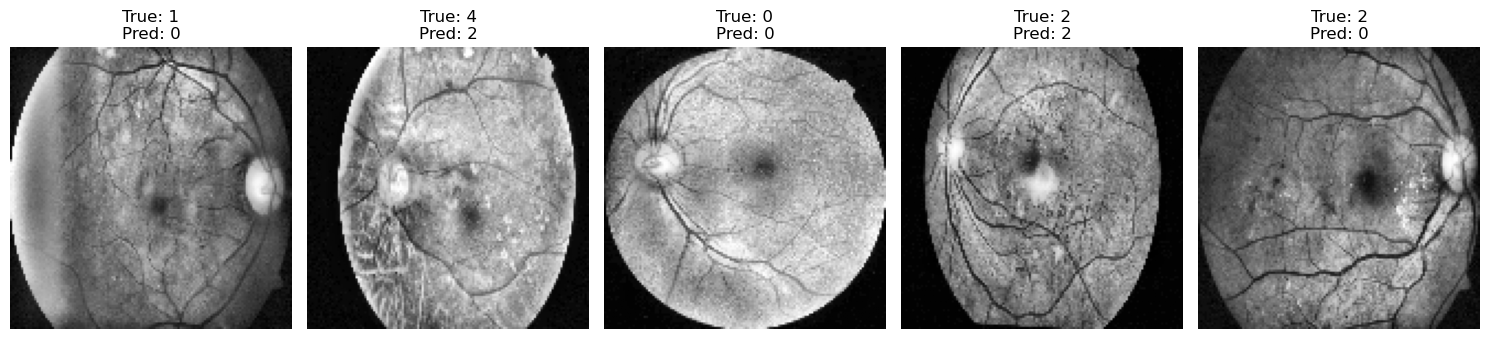

In [8]:
import random

# Pick 5 random indices from test set
indices = random.sample(range(len(X_test)), 5)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    # Reshape the flattened image back to 128x128
    img = X_test[idx].reshape(image_size, image_size)
    
    # Plot image
    plt.subplot(1, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
